In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
df=pd.read_csv("pizza_sales (1).csv")

## PIZZA SALES ANALYSIS


In [4]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
df.shape[0]

48620

In [7]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [9]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [10]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


#KPI'S

In [11]:
total_revenue=df['total_price'].sum()
total_quantity=df['quantity'].sum()
total_orders=df['order_id'].nunique()
avg_order_val=total_revenue/total_orders
avg_pizza_per_order=total_quantity/total_orders

In [12]:
print(f"Total Revenue: ${total_revenue :,.2f}")
print(f"Total Pizzas Sold: {total_quantity:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_val :,.2f}")
print(f"Average Pizza per Order:{avg_pizza_per_order: }")

Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Average Order Value: $38.31
Average Pizza per Order: 2.321967213114754


In [13]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

##Charts


##Ingredient Analysis

In [14]:
ingredient=(df['pizza_ingredients'].str.split(',')
           .explode().str.strip().value_counts().reset_index().rename(columns={'index':'Count','pizza_ingredients'
:'Ingredients'}))

print(ingredient.head(10))

         Ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


###Trend Analysis 

###Daily Trends- Total Orders

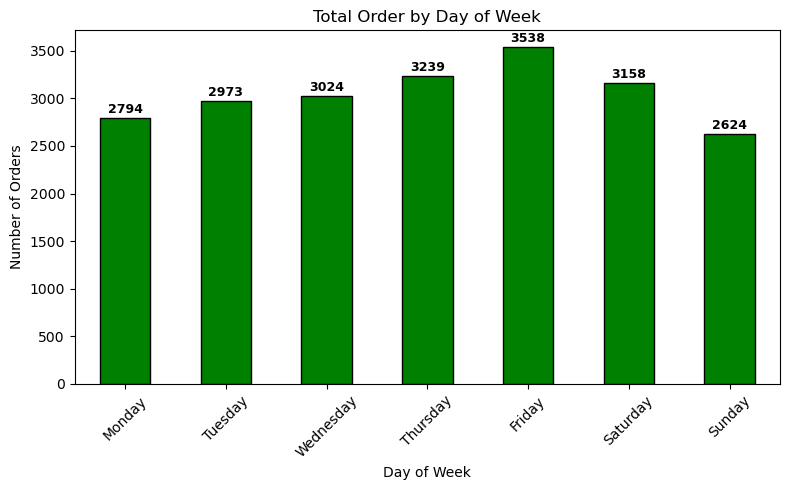

In [15]:
df['order_date'] =pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()

day_order= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_name']=pd.Categorical(df['day_name'],categories=day_order,ordered=True)
orders_by_day=df.groupby('day_name',observed=False)['order_id'].nunique()
ax = orders_by_day.plot(kind='bar',figsize=(8,5),color='green',edgecolor='black')

plt.title("Total Order by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
for i,val in enumerate(orders_by_day):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()


###Daily Trends- Total Revenue


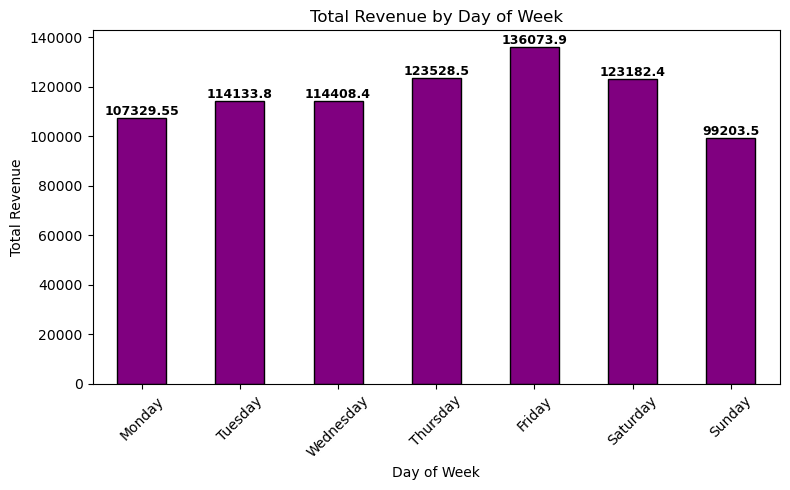

In [16]:
df['order_date'] =pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()

day_order= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_name']=pd.Categorical(df['day_name'],categories=day_order,ordered=True)
orders_by_day=df.groupby('day_name',observed=False)['total_price'].sum()
ax = orders_by_day.plot(kind='bar',figsize=(8,5),color='purple',edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
for i,val in enumerate(orders_by_day):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()


### Total Quantity

### Hourly Trend - Total Orders

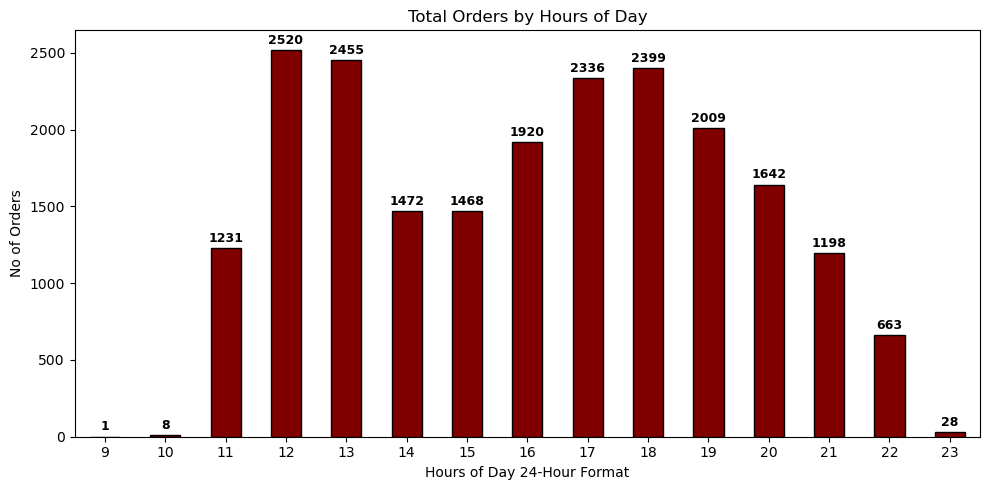

In [17]:
df['order_time'] =pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour


orders_by_hour=df.groupby('order_hour',observed=False)['order_id'].nunique()
ax = orders_by_hour.plot(kind='bar',figsize=(10,5),color='maroon',edgecolor='black')

plt.title("Total Orders by Hours of Day")
plt.xlabel("Hours of Day 24-Hour Format")
plt.ylabel("No of Orders")
plt.xticks(rotation=0)
for i,val in enumerate(orders_by_hour):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Total Sales

### Monthly Trends - Total Orders

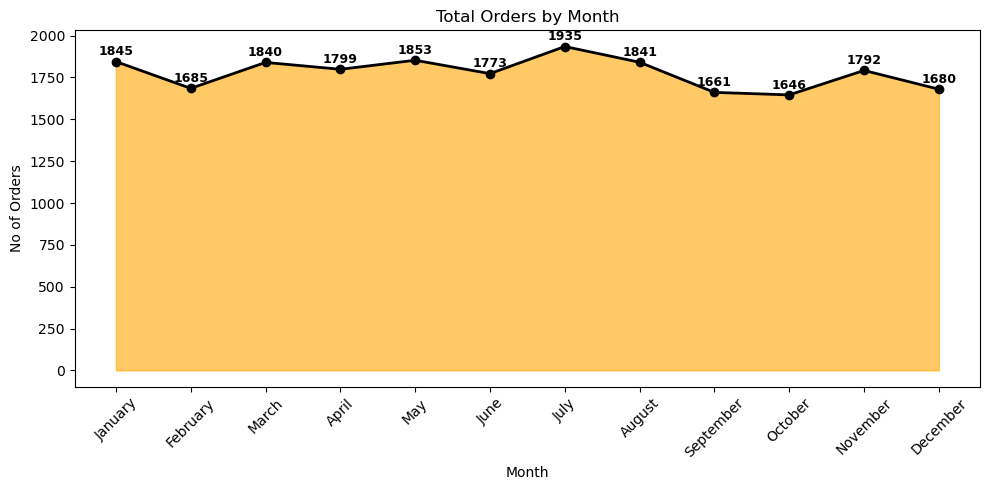

In [18]:
 df['order_date'] =pd.to_datetime(df['order_date'],dayfirst=True)
df['month_name']=df['order_date'].dt.month_name()

month_order= ["January","February","March","April","May","June","July","August","September","October","November","December"]
df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)
orders_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()
plt.figure(figsize=(10,5)) 
plt.fill_between(orders_by_month.index,orders_by_month.values,color='orange',alpha=0.6)
plt.plot(orders_by_month.index,orders_by_month.values,color='black',linewidth=2,marker='o')
plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("No of Orders")
plt.xticks(rotation=45)
for i,val in enumerate(orders_by_month):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()


### % of Sales by Category

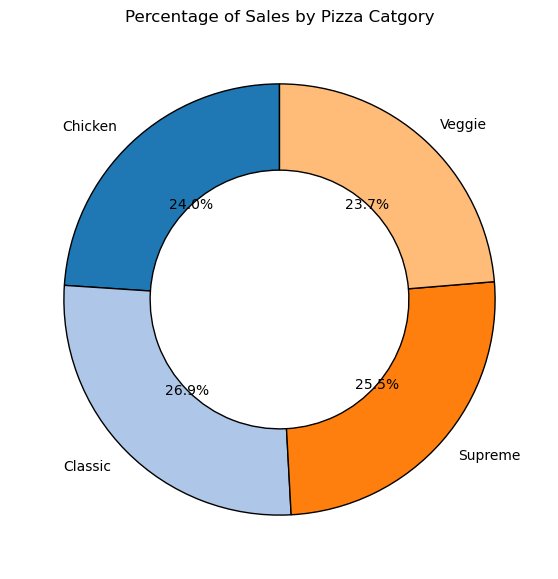

In [19]:
category_sales=df.groupby('pizza_category')['total_price'].sum()
category_pct=category_sales/category_sales.sum()*100
plt.figure(figsize=(7,7))
colors=plt.get_cmap('tab20').colors  

plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops={'edgecolor':'black','width':0.4})
plt.title('Percentage of Sales by Pizza Catgory')
plt.show()

### % of Sales by Pizza Size and Category

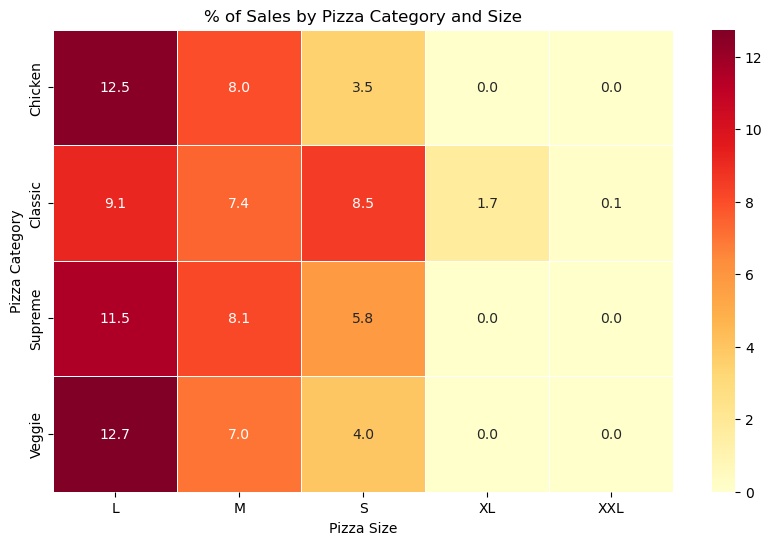

In [20]:
sales_pivot=df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0)
sales_pct=sales_pivot/sales_pivot.sum().sum()*100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct,annot=True,fmt='.1f',cmap='YlOrRd',linewidths=0.5)
plt.title('% of Sales by Pizza Category and Size')
plt.ylabel('Pizza Category')
plt.xlabel('Pizza Size')
plt.show()

### Total Pizza sold by Category

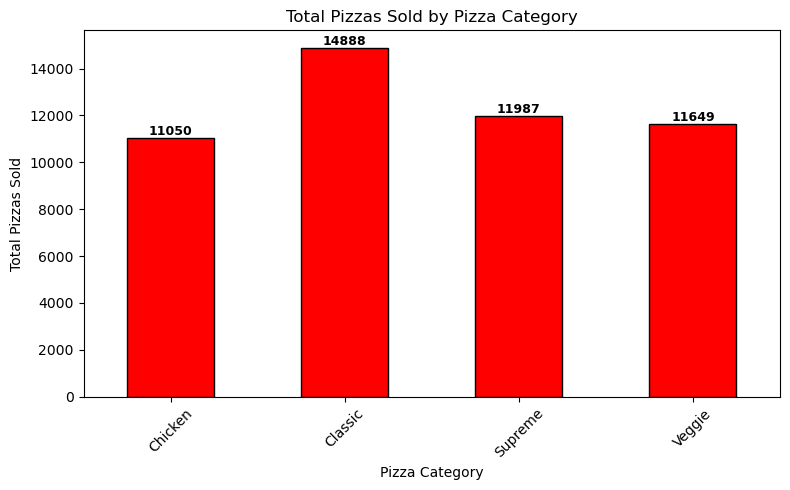

In [21]:
pizzas_by_category=df.groupby('pizza_category')['quantity'].sum()
ax=pizzas_by_category.plot(kind='bar',figsize=(8,5), color='red',edgecolor='black')
plt.title('Total Pizzas Sold by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best selling pizzas by Orders


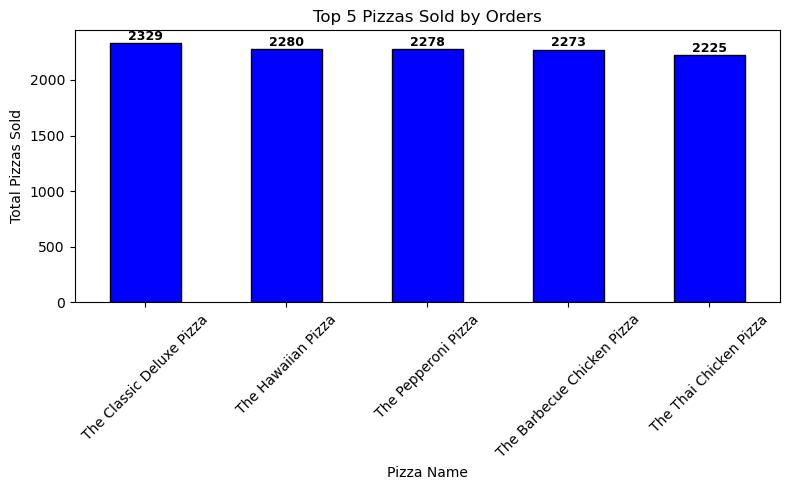

In [22]:
pizzas_by_name=df.groupby('pizza_name')['order_id'].nunique()
top5=pizzas_by_name.sort_values(ascending=False).head(5)
ax=top5.plot(kind='bar',figsize=(8,5), color='blue',edgecolor='black')
plt.title('Top 5 Pizzas Sold by Orders')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i,val+2,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()


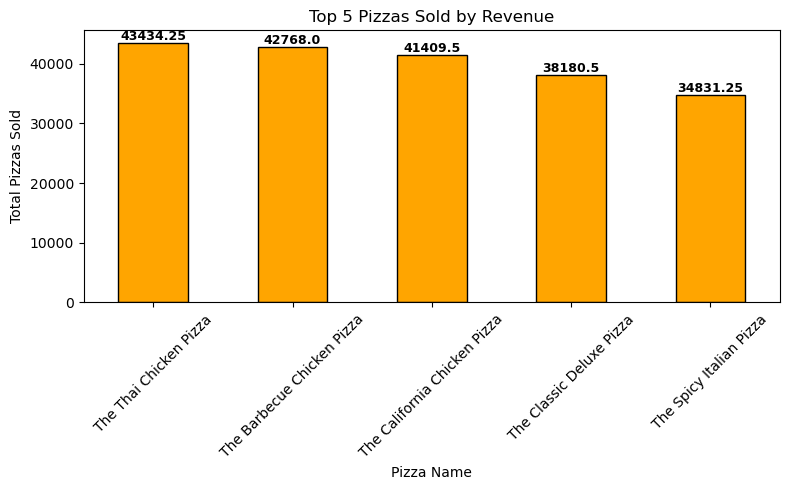

In [23]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()
top5=pizzas_by_name.sort_values(ascending=False).head(5)
ax=top5.plot(kind='bar',figsize=(8,5), color='orange',edgecolor='black')
plt.title('Top 5 Pizzas Sold by Revenue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i,val+2,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()


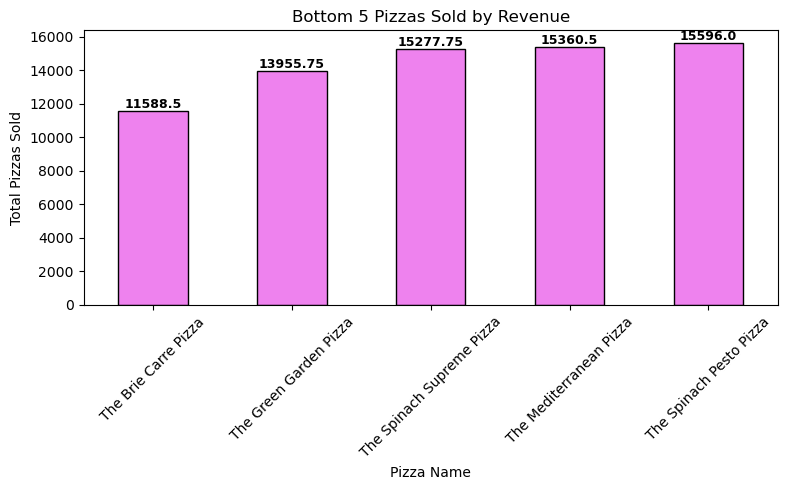

In [25]:
pizzas_by_name=df.groupby('pizza_name')['total_price'].sum()
bottom5=pizzas_by_name.sort_values(ascending=True).head(5)
ax=bottom5.plot(kind='bar',figsize=(8,5), color='Violet',edgecolor='black')
plt.title('Bottom 5 Pizzas Sold by Revenue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(i,val+2,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()


In [26]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,order_hour,month_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January


In [29]:
df.pizza_category.nunique()

4

In [32]:
df.pizza_ingredients.nunique()

32

In [34]:
df.describe()

,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,order_hour
count,48620.000000,48620.000000,48620.000000,48620,48620,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,1900-01-01 16:24:51.322151424,16.494132,16.821474,15.911806
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,1900-01-01 09:52:21,9.750000,9.750000,9.000000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,1900-01-01 13:24:46,12.750000,12.750000,13.000000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,1900-01-01 16:33:33,16.500000,16.500000,16.000000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,1900-01-01 18:55:19,20.250000,20.500000,18.000000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,1900-01-01 23:05:52,35.950000,83.000000,23.000000
std,14035.529381,6180.119770,0.143077,NaN,NaN,3.621789,4.437398,3.149836
